In [117]:
# Processing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing as pre
from sklearn.model_selection import train_test_split

# ML Libraries
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import random

#Libraries for the neural net



#Prepare data

columns = ['id','nb_words_title','nb_words_content','pp_uniq_words','pp_stop_words','pp_uniq_non-stop_words',
            'nb_links','nb_outside_links','nb_images','nb_videos','ave_word_length','nb_keywords','category',
            'nb_mina_mink','nb_mina_maxk','nb_mina_avek','nb_maxa_mink','nb_maxa_maxk','nb_maxa_avek','nb_avea_mink',
            'nb_avea_maxk','nb_avea_avek','nb_min_linked','nb_max_linked','nb_ave_linked','weekday','dist_topic_0',
            'dist_topic_1','dist_topic_2','dist_topic_3','dist_topic_4','subj','polar','pp_pos_words','pp_neg_words',
            'pp_pos_words_in_nonneutral','ave_polar_pos','min_polar_pos','max_polar_pos','ave_polar_neg','min_polar_neg',
            'max_polar_neg','subj_title','polar_title'
          ]

train_data = pd.read_csv('../train.csv', delimiter =' ', names = columns)
train_data_target = pd.read_csv('../train-targets.csv')
train_data_target = train_data_target.set_index('Id')


test_set = pd.read_csv('../test-val.csv', delimiter = ' ')



util_train_data = pre.scale(train_data.drop('id', axis=1))
util_train_data = pd.DataFrame(util_train_data, columns = columns[1:])

train_data,test_set,target_train,target_test = train_test_split(
                                                        util_train_data,
                                                        train_data_target,
                                                        random_state = 0)

# We prepare the compute score if necessary

def compute_score(clf,X, y):
    xval = cross_val_score(clf, X, y, cv = 5)
    return(np.mean(xval))




<h1 style = "text-align:center">Test d'un modèle linéaire </h1>

In [69]:
# from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(train_data,target_train)

C:\Users\victor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [134]:
def linear_model(C_wanted,gamma_wanted):
    svr_rbf = SVR(kernel='rbf', C=C_wanted, gamma=gamma_wanted)
    svr_rbf.fit(train_data,target_train)
    prediction_array = svr_rbf.predict(test_set)
    target_test.loc[:,'predicted'] = prediction_array
    errors = []
    for row in target_test.iterrows():
        errors.append((row[1]['Prediction']-row[1]['predicted'])/row[1]['Prediction'])
    return(sum(errors)/len(errors)*100)
    

#for index,prediction in enumerate(y_rbf):
#    if prediction == target_test[index]:
#        print('GOOD PREDICTION')
#    else:
#        print('BAD PREDICTION')


In [138]:
# Test manipualton des coef
errors = []
x = []
for k in range(1,100):
    print("Début calcul erreur modèle", k,'avec C = 1000 et gamma = ',0.01*k)
    x.append(k)
    errors.append(linear_model(1000,0.001*k))    

Début calcul erreur modèle 1 avec C = 1000 et gamma =  0.01


C:\Users\victor\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\victor\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Début calcul erreur modèle 2 avec C = 1000 et gamma =  0.02
Début calcul erreur modèle 3 avec C = 1000 et gamma =  0.03
Début calcul erreur modèle 4 avec C = 1000 et gamma =  0.04
Début calcul erreur modèle 5 avec C = 1000 et gamma =  0.05
Début calcul erreur modèle 6 avec C = 1000 et gamma =  0.06
Début calcul erreur modèle 7 avec C = 1000 et gamma =  0.07
Début calcul erreur modèle 8 avec C = 1000 et gamma =  0.08
Début calcul erreur modèle 9 avec C = 1000 et gamma =  0.09
Début calcul erreur modèle 10 avec C = 1000 et gamma =  0.1
Début calcul erreur modèle 11 avec C = 1000 et gamma =  0.11
Début calcul erreur modèle 12 avec C = 1000 et gamma =  0.12
Début calcul erreur modèle 13 avec C = 1000 et gamma =  0.13
Début calcul erreur modèle 14 avec C = 1000 et gamma =  0.14
Début calcul erreur modèle 15 avec C = 1000 et gamma =  0.15
Début calcul erreur modèle 16 avec C = 1000 et gamma =  0.16
Début calcul erreur modèle 17 avec C = 1000 et gamma =  0.17
Début calcul erreur modèle 18 ave

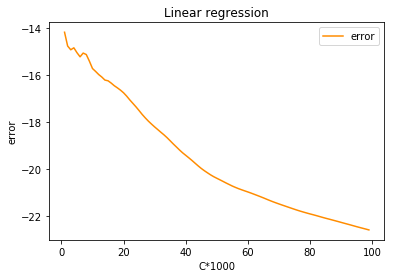

In [139]:
plt.plot(x,errors,color='darkorange', label='error')
plt.xlabel('C*1000')
plt.ylabel('error')
plt.title('Linear regression')
plt.legend()
plt.show()


In [35]:
#lw = 2
#plt.scatter(np.linspace(0,target_test.shape[0],target_test.shape[0]), [ k for k in target_test], color='darkorange', label='data')
#plt.scatter(np.linspace(0,len(y_rbf),len(y_rbf)), y_rbf, color='navy', lw=lw, label='RBF model')
#plt.xlabel('data')
#plt.ylabel('target')
#plt.title('Support Vector Regression')
#plt.legend()
#plt.show()
    #print(vector)

In [34]:
y_rbf




AttributeError: 'numpy.ndarray' object has no attribute 'apply'

In [112]:
nbr_split = 50
evol_score = []

clf = RandomForestClassifier()

#for k in range(200,210):
#    print('chargement du ',k,' sample')
#    train_data = pd.read_csv('../train.csv', delimiter =' ', names = columns)
#    train_data_target = pd.read_csv('../train-targets.csv')
#    util_train_data = pre.scale(train_data.drop('id', axis=1))
#    util_train_data = pd.DataFrame(util_train_data, columns = columns[1:])
#    
#    train_data_target['cluster'] = train_data_target['Prediction'].apply(lambda x: x//nbr_split)
#
#    clf.fit(train_data,target_train)
#    score = cross_val_score(clf, test_set, Tetarget, cv=5)
#    evol_score.append(np.mean(score))
#    print('For nbr_cluster = ',k," cross validation is : ",score)

#pd.DataFrame(target_train)
target_train


KeyError: 'Prediction'

In [58]:
nbr_split = 3259

target_test['cluster'] = pd.DataFrame(target_test)['Prediction'].apply(lambda x: x//nbr_split)

target_test = pd.DataFrame(target_test)

#target_test['cluster'].index == test_set.index #first index 398
#for index in range(len(target_test['cluster'].index)):
#    print(target_test['cluster'][index] == test_set.index[index])
#test_set # last index 2287

#target_test['cluster'][:1250]
#compute_score(clf,test_set,target_test['cluster'])

1250

PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


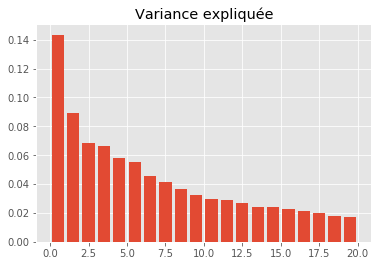

In [8]:

from sklearn.decomposition import PCA

%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use('ggplot')

pca = PCA(n_components = 20)
print(pca.fit(util_train_data))
pca.explained_variance_ratio_

plt.bar(np.arange(len(pca.explained_variance_ratio_))+0.5, pca.explained_variance_ratio_)
plt.title("Variance expliquée")



In [9]:
sum(pca.explained_variance_ratio_)

0.86866768494426805

In [66]:
print(sum(pca.explained_variance_ratio_))

0.935065760494


<h1 style = "text-align:center">Test implementation résau de neuronne Keras</h1>


In [2]:
#!pip install keras
!pip install tensorflow


In [12]:
#commande pour installer tensorflow si tu l'as pas. On va utiliser Keras sur tensorflow
#!py -m pip install --upgrade https://storage.googleapis.com/tensorflow/mac/cpu/tensorflow-0.12.0-py3-none-any.whl
import tensorflow
import os

os.getcwd()


ImportError: Traceback (most recent call last):
  File "C:\Users\victor\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 18, in swig_import_helper
    fp, pathname, description = imp.find_module('_pywrap_tensorflow', [dirname(__file__)])
  File "C:\Users\victor\AppData\Local\Continuum\anaconda3\lib\imp.py", line 296, in find_module
    raise ImportError(_ERR_MSG.format(name), name=name)
ImportError: No module named '_pywrap_tensorflow'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\victor\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\__init__.py", line 54, in <module>
    from tensorflow.python import pywrap_tensorflow
  File "C:\Users\victor\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 28, in <module>
    _pywrap_tensorflow = swig_import_helper()
  File "C:\Users\victor\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 20, in swig_import_helper
    import _pywrap_tensorflow
ModuleNotFoundError: No module named '_pywrap_tensorflow'


Error importing tensorflow.  Unless you are using bazel,
you should not try to import tensorflow from its source directory;
please exit the tensorflow source tree, and relaunch your python interpreter
from there.

In [10]:
208300
2**18


262144

In [109]:
# Create first network with Keras
import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# split into input (X) and output (Y) variables
# create model
model = Sequential()
model.add(Dense(30, input_dim=43, init='uniform', activation='relu'))
model.add(Dense(25, init='uniform', activation='relu'))
model.add(Dense(18, init='uniform', activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, epochs=150, batch_size=10,  verbose=2)
# calculate predictions
predictions = model.predict(X)
# round predictions
rounded = [round(x[0]) for x in predictions]
print(rounded)

Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'